# Case Overview

## Catalog Visualization

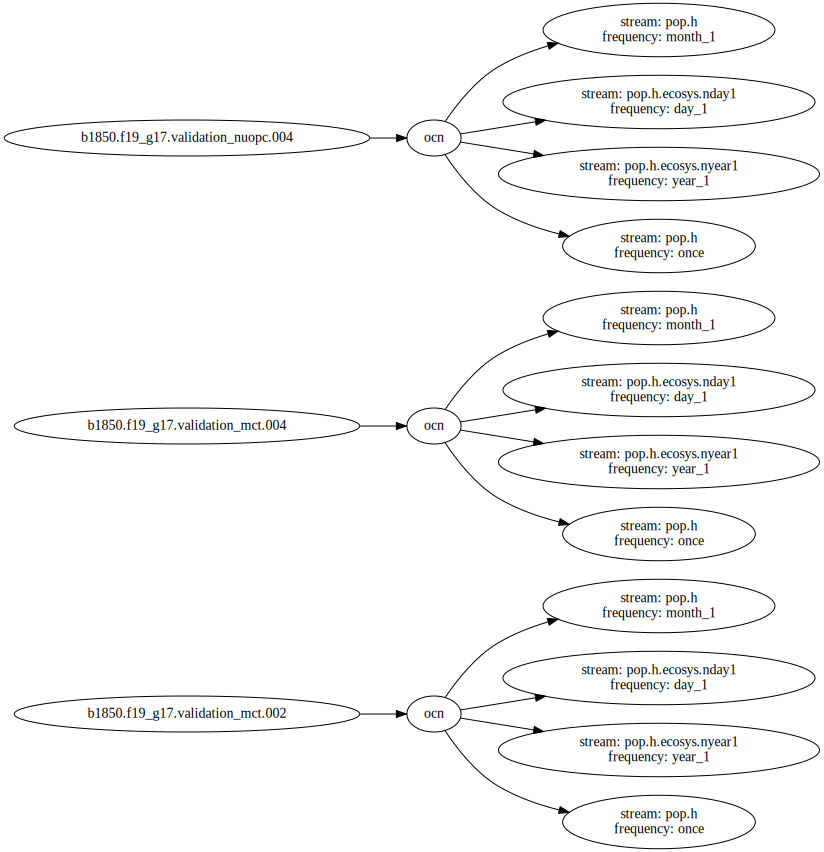

In [2]:
import pandas as pd
from graphviz import Digraph
from config import analysis_config

df = pd.read_csv(analysis_config['catalog_csv'])
# Create Digraph object - use the left to right orientation instead of vertical
dot = Digraph(graph_attr={'rankdir': 'LR'})

# Save the catalog as a pdf
dot.format = 'pdf'

# Start counting at one for node numbers
num_node = 1

# Loop through the different cases
for case in df.case.unique():
    case_i = num_node
    dot.node(str(case_i), label=case)
    num_node += 1

    # Loop through the different components in each case
    for component in df.loc[df.case == case].component.unique():
        comp_i = num_node
        dot.node(str(comp_i), label=component)
        dot.edge(str(case_i), str(comp_i))
        num_node += 1

        # Loop through the frequency in each component within each experiment
        for frequency in df.loc[(df.case == case) & (df.component == component)].frequency.unique():
            freq_i = num_node

            # Pull out the the stream information
            stream = df.loc[
                (df.case == case) & (df.component == component) & (df.frequency == frequency)
            ].stream.values[0]

            # Add both stream and frequency information to these bubbles
            dot.node(str(freq_i), label=f'stream: {stream} \n frequency: {frequency}')
            dot.edge(str(comp_i), str(freq_i))
            num_node += 1
        comp_i += 1
    case_i += 1
dot

## Catalog Table

In [3]:
df

,component,stream,date,case,member_id,frequency,variables,path
0,ocn,pop.h,0001-01,b1850.f19_g17.validation_mct.002,2,month_1,"['UVEL', 'UVEL2', 'VVEL', 'VVEL2', 'TEMP', 'dT...",/glade/scratch/hannay/archive/b1850.f19_g17.va...
1,ocn,pop.h,0001-02,b1850.f19_g17.validation_mct.002,2,month_1,"['UVEL', 'UVEL2', 'VVEL', 'VVEL2', 'TEMP', 'dT...",/glade/scratch/hannay/archive/b1850.f19_g17.va...
2,ocn,pop.h,0001-03,b1850.f19_g17.validation_mct.002,2,month_1,"['UVEL', 'UVEL2', 'VVEL', 'VVEL2', 'TEMP', 'dT...",/glade/scratch/hannay/archive/b1850.f19_g17.va...
3,ocn,pop.h,0001-04,b1850.f19_g17.validation_mct.002,2,month_1,"['UVEL', 'UVEL2', 'VVEL', 'VVEL2', 'TEMP', 'dT...",/glade/scratch/hannay/archive/b1850.f19_g17.va...
4,ocn,pop.h,0001-05,b1850.f19_g17.validation_mct.002,2,month_1,"['UVEL', 'UVEL2', 'VVEL', 'VVEL2', 'TEMP', 'dT...",/glade/scratch/hannay/archive/b1850.f19_g17.va...
...,...,...,...,...,...,...,...,...
11098,ocn,pop.h.nday1,0100-09-01,b1850.f19_g17.validation_nuopc.004,4,day_1,"['SST', 'SST2', 'SSS', 'HMXL_DR_2', 'XMXL_2']",/glade/scratch/hannay/archive/b1850.f19_g17.va...
11099,ocn,pop.h.nday1,0100-10-01,b1850.f19_g17.validation_nuopc.004,4,day_1,"['SST', 'SST2', 'SSS', 'HMXL_DR_2', 'XMXL_2']",/glade/scratch/hannay/archive/b1850.f19_g17.va...
11100,ocn,pop.h.nday1,0100-11-01,b1850.f19_g17.validation_nuopc.004,4,day_1,"['SST', 'SST2', 'SSS', 'HMXL_DR_2', 'XMXL_2']",/glade/scratch/hannay/archive/b1850.f19_g17.va...
11101,ocn,pop.h.nday1,0100-12-01,b1850.f19_g17.validation_nuopc.004,4,day_1,"['SST', 'SST2', 'SSS', 'HMXL_DR_2', 'XMXL_2']",/glade/scratch/hannay/archive/b1850.f19_g17.va...
